In [2]:
import os
import sys
import subprocess
import numpy as np
# import glob
import json
import pandas as pd
import shutil
import librosa.display
# from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import csv
import IPython.display as ipd
import random

In [3]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimsunhee","key":"5d873ecbd75fa0fb5ee4a42d5e533f5d"}'}

In [4]:
ls -1ha kaggle.json

kaggle.json


In [5]:
ls

kaggle.json  sample_data/


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         50           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         80           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        570           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        109           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1121           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      13309           False  
house-pr

In [7]:
!kaggle datasets download -d sarabhian/coswara-dataset-heavy-cough

 98% 622M/632M [00:08<00:00, 97.9MB/s]
100% 632M/632M [00:08<00:00, 82.0MB/s]


In [8]:
ls

coswara-dataset-heavy-cough.zip  kaggle.json  sample_data/


In [9]:
!unzip coswara-dataset-heavy-cough.zip

Archive:  coswara-dataset-heavy-cough.zip
  inflating: coswara_data/kaggle_data/00xKcQMmcAhX8CODgBBLOe7Dm0T2/cough.wav  
  inflating: coswara_data/kaggle_data/01OCEf1yB4czsq8ygRoT51s96Ba2/cough.wav  
  inflating: coswara_data/kaggle_data/01n0u9YSkXQSkmN45J65eigyCMC3/cough.wav  
  inflating: coswara_data/kaggle_data/03TmwzsdEBVEh35MRMbC9d0NnfI3/cough.wav  
  inflating: coswara_data/kaggle_data/05acPS4aRGfvuOfku11Za8zve8i2/cough.wav  
  inflating: coswara_data/kaggle_data/05bieNLXPuaIWEVaX81EkbbjVrh1/cough.wav  
  inflating: coswara_data/kaggle_data/08tlSbvXpAggZavIGW994adhh1m1/cough.wav  
  inflating: coswara_data/kaggle_data/0B1rE91KabdId1lUmWJB7NLg8OP2/cough.wav  
  inflating: coswara_data/kaggle_data/0EAAFsDWfTcrhktHy78LS6nf19G3/cough.wav  
  inflating: coswara_data/kaggle_data/0HIgO2EhOOW1msCbEw1kC8Qsx6D3/cough.wav  
  inflating: coswara_data/kaggle_data/0Ha52POVIxTKEPqI1eGpIoMHUd52/cough.wav  
  inflating: coswara_data/kaggle_data/0Js6ZUZQ9NUnu568Fh7B6mZ1R8o1/cough.wav  
  inflatin

In [10]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/sesac /coswara_data/kaggle_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
!cp -r /content/drive/MyDrive/Colab Notebooks/sesac /csvs

cp: target '/csvs' is not a directory


In [12]:
data_path = "/content/coswara_data/kaggle_data"
csvs_path = "./csvs"

In [13]:
hcough_files =[]
for dirpath, subdirs, files in os.walk(data_path):
#     print(files)
    hcough_files.extend(os.path.join(dirpath, x) for x in files if os.path.isfile(os.path.join(dirpath, x)))
print("total files :" ,len(hcough_files)) 
print("path of file at loc [0] :" ,hcough_files[0]) # path of file
print("id of file at loc[0]",hcough_files[0][-38:-10] )# id of each file

dff = pd.DataFrame(columns=['id','path'])
dff['path']=hcough_files 
dff['id'] = dff.path.apply(lambda x: x[-38:-10])
dff.head()

total files : 2313
path of file at loc [0] : /content/coswara_data/kaggle_data/RtRqhfGUUffisj4mpxA9nTYe2cw2/cough.wav
id of file at loc[0] RtRqhfGUUffisj4mpxA9nTYe2cw2


id  \
0  RtRqhfGUUffisj4mpxA9nTYe2cw2   
1  TKhrUVnxGFfRdH4oaKwMXiwjR082   
2  2SLFvRD3jTUJc8iOMnN2XHG3uXv1   
3  eD46zs0Gr9Rm2dRnRvkdjI0jc953   
4  jx5lw63NN0SESDVLpYEQTHXuzti2   

                                                path  
0  /content/coswara_data/kaggle_data/RtRqhfGUUffi...  
1  /content/coswara_data/kaggle_data/TKhrUVnxGFfR...  
2  /content/coswara_data/kaggle_data/2SLFvRD3jTUJ...  
3  /content/coswara_data/kaggle_data/eD46zs0Gr9Rm...  
4  /content/coswara_data/kaggle_data/jx5lw63NN0SE...

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
data = librosa.load(dff.path.loc[1],sr = 22050)
ipd.Audio(dff.path.loc[1])

In [16]:
csv_files =[]
for dirpath, subdirs, files in os.walk(csvs_path):
    csv_files.extend(os.path.join(dirpath, x) for x in files if x.endswith(".csv"))
csv_files

['./csvs/20200814.csv',
 './csvs/20200413.csv',
 './csvs/20200418.csv',
 './csvs/20210603.csv',
 './csvs/20200820.csv',
 './csvs/20201012.csv',
 './csvs/20210426.csv',
 './csvs/20200720.csv',
 './csvs/20210630.csv',
 './csvs/20200604.csv',
 './csvs/20210206.csv',
 './csvs/20200707.csv',
 './csvs/20210523.csv',
 './csvs/20220116.csv',
 './csvs/20210406.csv',
 './csvs/20210816.csv',
 './csvs/20200505.csv',
 './csvs/20200419.csv',
 './csvs/20200911.csv',
 './csvs/20210419.csv',
 './csvs/20200919.csv',
 './csvs/20200504.csv',
 './csvs/20210507.csv',
 './csvs/20200415.csv',
 './csvs/20201031.csv',
 './csvs/20210930.csv',
 './csvs/20200417.csv',
 './csvs/20200416.csv',
 './csvs/20200824.csv',
 './csvs/20210830.csv',
 './csvs/20200502.csv',
 './csvs/20210914.csv',
 './csvs/20200525.csv',
 './csvs/20200803.csv',
 './csvs/20210618.csv',
 './csvs/20201221.csv',
 './csvs/20200424.csv',
 './csvs/20201130.csv',
 './csvs/20210714.csv',
 './csvs/20200901.csv',
 './csvs/20200430.csv',
 './csvs/2020093

In [17]:
pwd

'/content'

In [18]:
print("total present csvs :", len(os.listdir(csvs_path)))

total present csvs : 42


In [19]:
all_files=[]
for files in os.listdir(csvs_path):
    if files[-3:]=="csv":
        all_files.append(files)
all_files.sort()
all_files

['20200413.csv',
 '20200415.csv',
 '20200416.csv',
 '20200417.csv',
 '20200418.csv',
 '20200419.csv',
 '20200424.csv',
 '20200430.csv',
 '20200502.csv',
 '20200504.csv',
 '20200505.csv',
 '20200525.csv',
 '20200604.csv',
 '20200707.csv',
 '20200720.csv',
 '20200803.csv',
 '20200814.csv',
 '20200820.csv',
 '20200824.csv',
 '20200901.csv',
 '20200911.csv',
 '20200919.csv',
 '20200930.csv',
 '20201012.csv',
 '20201031.csv',
 '20201130.csv',
 '20201221.csv',
 '20210206.csv',
 '20210406.csv',
 '20210419.csv',
 '20210426.csv',
 '20210507.csv',
 '20210523.csv',
 '20210603.csv',
 '20210618.csv',
 '20210630.csv',
 '20210714.csv',
 '20210816.csv',
 '20210830.csv',
 '20210914.csv',
 '20210930.csv',
 '20220116.csv']

In [20]:
os.chdir(csvs_path)

df_list =[]
for i in range(len(all_files)):
    temp_df = pd.read_csv(all_files[i])
    df_list.append(temp_df)
df = pd.concat(df_list, ignore_index=True, sort=False)
df.head()

id    l_c   a record_date covid_status    iF ep  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2  India  24  2020-04-13      healthy  True  y   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2  India  72  2020-04-13      healthy  True  y   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2  India  54  2020-04-13      healthy  True  y   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2  India  31  2020-04-13      healthy  True  y   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2  India  26  2020-04-13      healthy  True  y   

      g          l_s   dT  ... test_status diarrhoea ctScan vacc testType  \
0  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
1  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
2  male  Maharashtra  web  ...         NaN       NaN    NaN  NaN      NaN   
3  male    Karnataka  web  ...         NaN       NaN    NaN  NaN      NaN   
4  male      Haryana  web  ...         NaN       NaN    NaN  NaN      NaN   

  test_date others_preexist ctDate ctScore  others_resp  
0       NaN             NaN    NaN     NaN          NaN  
1       NaN             NaN    NaN     NaN          NaN  
2       NaN             NaN    NaN     NaN          NaN  
3       NaN             NaN    NaN     NaN          NaN  
4       NaN             NaN    NaN     NaN          NaN  

[5 rows x 41 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2374 entries, 0 to 2373
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2374 non-null   object 
 1   l_c              2374 non-null   object 
 2   a                2374 non-null   int64  
 3   record_date      2374 non-null   object 
 4   covid_status     2374 non-null   object 
 5   iF               76 non-null     object 
 6   ep               2374 non-null   object 
 7   g                2374 non-null   object 
 8   l_s              2374 non-null   object 
 9   dT               1770 non-null   object 
 10  l_l              2113 non-null   object 
 11  diabetes         196 non-null    object 
 12  asthma           119 non-null    object 
 13  smoker           714 non-null    object 
 14  ht               193 non-null    object 
 15  fever            264 non-null    object 
 16  date             604 non-null    object 
 17  cld           

In [22]:
df['str_date']=pd.to_datetime(df['record_date'])
df['date']=df['str_date'].dt.strftime('%Y%m%d')
df.head(10)

id     l_c   a record_date  \
0  vK2bLRNzllXNeyOMudnNSL5cfpG2   India  24  2020-04-13   
1  bjA2KpSxneNskrLBeqi4bqoTDQl2   India  72  2020-04-13   
2  FSzobvJqOXf0rI6X05cHqOiU9Mu2   India  54  2020-04-13   
3  EqDWckxbsETyHUeBLQ8jLtxlhir2   India  31  2020-04-13   
4  FGRDO4IBbAejR0WHD5YbkXTCasg2   India  26  2020-04-13   
5  htQzROl26OWQpIYFDzv11F79PLR2   India  24  2020-04-13   
6  pW9mCAeWYiMoM7wW7riLvNRbYDO2   India  37  2020-04-13   
7  Eu11s84cuBTiPXTAtVf9mj3GkqA2  Canada  23  2020-04-13   
8  L7S8iIPKgiO6QWLC3mGkROCMa0s1   India  40  2020-04-13   
9  eP8gEM0KcBU6S5JpMdycX74KP3p2   India  32  2020-04-13   

                  covid_status    iF ep     g          l_s   dT  ...  \
0                      healthy  True  y  male    Karnataka  web  ...   
1                      healthy  True  y  male  Maharashtra  web  ...   
2                      healthy  True  y  male  Maharashtra  web  ...   
3                      healthy  True  y  male    Karnataka  web  ...   
4                      healthy  True  y  male      Haryana  web  ...   
5                      healthy  True  y  male    Karnataka  web  ...   
6                      healthy  True  y  male  Maharashtra  web  ...   
7                      healthy  True  y  male      Ontario  web  ...   
8  resp_illness_not_identified  True  y  male      Gujarat  web  ...   
9                      healthy  True  y  male    Telangana  web  ...   

  diarrhoea ctScan vacc testType test_date others_preexist ctDate ctScore  \
0       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
1       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
2       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
3       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
4       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
5       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
6       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
7       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
8       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   
9       NaN    NaN  NaN      NaN       NaN             NaN    NaN     NaN   

  others_resp   str_date  
0         NaN 2020-04-13  
1         NaN 2020-04-13  
2         NaN 2020-04-13  
3         NaN 2020-04-13  
4         NaN 2020-04-13  
5         NaN 2020-04-13  
6         NaN 2020-04-13  
7         NaN 2020-04-13  
8         NaN 2020-04-13  
9         NaN 2020-04-13  

[10 rows x 42 columns]

In [23]:
tdf = pd.merge(dff ,df , on = 'id')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2311
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2312 non-null   object        
 1   path             2312 non-null   object        
 2   l_c              2312 non-null   object        
 3   a                2312 non-null   int64         
 4   record_date      2312 non-null   object        
 5   covid_status     2312 non-null   object        
 6   iF               76 non-null     object        
 7   ep               2312 non-null   object        
 8   g                2312 non-null   object        
 9   l_s              2312 non-null   object        
 10  dT               1708 non-null   object        
 11  l_l              2061 non-null   object        
 12  diabetes         194 non-null    object        
 13  asthma           116 non-null    object        
 14  smoker           652 non-null    object 

In [24]:
tdf.head()

id  \
0  RtRqhfGUUffisj4mpxA9nTYe2cw2   
1  TKhrUVnxGFfRdH4oaKwMXiwjR082   
2  2SLFvRD3jTUJc8iOMnN2XHG3uXv1   
3  eD46zs0Gr9Rm2dRnRvkdjI0jc953   
4  jx5lw63NN0SESDVLpYEQTHXuzti2   

                                                path    l_c   a record_date  \
0  /content/coswara_data/kaggle_data/RtRqhfGUUffi...  India  64  2021-09-27   
1  /content/coswara_data/kaggle_data/TKhrUVnxGFfR...  India  36  2020-04-14   
2  /content/coswara_data/kaggle_data/2SLFvRD3jTUJ...  India  23  2020-04-14   
3  /content/coswara_data/kaggle_data/eD46zs0Gr9Rm...  India  29  2020-04-16   
4  /content/coswara_data/kaggle_data/jx5lw63NN0SE...  India  39  2020-04-15   

                  covid_status   iF ep       g         l_s  ... diarrhoea  \
0                positive_mild  NaN  y  female  Tamil Nadu  ...       NaN   
1  resp_illness_not_identified  NaN  y    male      Kerala  ...       NaN   
2  resp_illness_not_identified  NaN  y    male   Karnataka  ...       NaN   
3                      healthy  NaN  y    male   Telangana  ...       NaN   
4                      healthy  NaN  y    male  Tamil Nadu  ...       NaN   

  ctScan vacc testType   test_date others_preexist      ctDate ctScore  \
0      y    y    rtpcr  2021-09-24             NaN  2021-09-26     2.0   
1    NaN  NaN      NaN         NaN             NaN         NaN     NaN   
2    NaN  NaN      NaN         NaN             NaN         NaN     NaN   
3    NaN  NaN      NaN         NaN             NaN         NaN     NaN   
4    NaN  NaN      NaN         NaN             NaN         NaN     NaN   

  others_resp   str_date  
0         NaN 2021-09-27  
1         NaN 2020-04-14  
2         NaN 2020-04-14  
3         NaN 2020-04-16  
4         NaN 2020-04-15  

[5 rows x 43 columns]

In [25]:
tdf.to_csv('tdf.csv',index=False)

In [170]:
tdf=pd.read_csv('/content/csvs/tdf.csv')

In [27]:
data = librosa.load(tdf.path.loc[1343],sr =22050)
ipd.Audio(tdf['path'].loc[1343])

In [171]:
df = tdf.copy()
df['status']=0
for i in range(0,2312):
    if ((df.covid_status.loc[i]!='positive_mild') or (df.covid_status.loc[i]!='positive_moderate') or (df.covid_status.loc[i]!='positive_asymp')):
        df["status"].loc[i]='negative'
    
    if ((df.covid_status.loc[i]=='positive_mild') or (df.covid_status.loc[i]=='positive_moderate') or (df.covid_status.loc[i]=='positive_asymp')):
        df["status"].loc[i]='positive' 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [172]:
df["status"]!='positive' 

0       False
1        True
2        True
3        True
4        True
        ...  
2307     True
2308    False
2309    False
2310     True
2311     True
Name: status, Length: 2312, dtype: bool

In [173]:
df[df['status']=='negative'].count()

id                 1829
path               1829
l_c                1829
a                  1829
record_date        1829
covid_status       1829
iF                   76
ep                 1829
g                  1829
l_s                1829
dT                 1226
l_l                1621
diabetes            111
asthma              106
smoker              353
ht                  122
fever                52
date               1829
cld                  34
ihd                  16
fV                 1150
rU                 1150
cold                122
cough               156
test                  1
loss_of_smell        23
pneumonia            32
um                  794
bd                   91
st                   56
ftg                  60
mp                   59
test_status         511
diarrhoea             6
ctScan              236
vacc                236
testType            147
test_date           147
others_preexist      55
ctDate               50
ctScore              50
others_resp     

In [174]:
df[df['status']=='positive'].count()

id                 483
path               483
l_c                483
a                  483
record_date        483
covid_status       483
iF                   0
ep                 483
g                  483
l_s                483
dT                 482
l_l                440
diabetes            83
asthma              10
smoker             299
ht                  69
fever              196
date               483
cld                  4
ihd                 10
fV                 482
rU                 482
cold               195
cough              265
test                 0
loss_of_smell      110
pneumonia           12
um                 480
bd                  84
st                 131
ftg                179
mp                 153
test_status        388
diarrhoea           34
ctScan             293
vacc               293
testType           293
test_date          293
others_preexist     28
ctDate              84
ctScore             84
others_resp         11
str_date           483
status     

In [175]:
negative_df= df[df['status'] == 'negative'][0:483]
negative_df

id  \
1    TKhrUVnxGFfRdH4oaKwMXiwjR082   
2    2SLFvRD3jTUJc8iOMnN2XHG3uXv1   
3    eD46zs0Gr9Rm2dRnRvkdjI0jc953   
4    jx5lw63NN0SESDVLpYEQTHXuzti2   
5    ZkYT8z9lW7N4UfY1L9CqlOs9ouk1   
..                            ...   
595  3lZgD6k6S8UMxivbNoeGJ6SIEn72   
596  GEPcHiIXaSVyNNL5sqIBZxytIps1   
597  6OVT42wvVggUA7rkEuziRRtNNuo2   
598  VXCvsGinvzPFVkLNlvJFw7z9G8j1   
599  eP8gEM0KcBU6S5JpMdycX74KP3p2   

                                                  path            l_c   a  \
1    /content/coswara_data/kaggle_data/TKhrUVnxGFfR...          India  36   
2    /content/coswara_data/kaggle_data/2SLFvRD3jTUJ...          India  23   
3    /content/coswara_data/kaggle_data/eD46zs0Gr9Rm...          India  29   
4    /content/coswara_data/kaggle_data/jx5lw63NN0SE...          India  39   
5    /content/coswara_data/kaggle_data/ZkYT8z9lW7N4...          India  25   
..                                                 ...            ...  ..   
595  /content/coswara_data/kaggle_data/3lZgD6k6S8UM...          India  51   
596  /content/coswara_data/kaggle_data/GEPcHiIXaSVy...  United States  22   
597  /content/coswara_data/kaggle_data/6OVT42wvVggU...          India  27   
598  /content/coswara_data/kaggle_data/VXCvsGinvzPF...          India  25   
599  /content/coswara_data/kaggle_data/eP8gEM0KcBU6...          India  32   

    record_date                 covid_status    iF ep     g         l_s  ...  \
1    2020-04-14  resp_illness_not_identified   NaN  y  male      Kerala  ...   
2    2020-04-14  resp_illness_not_identified   NaN  y  male   Karnataka  ...   
3    2020-04-16                      healthy   NaN  y  male   Telangana  ...   
4    2020-04-15                      healthy   NaN  y  male  Tamil Nadu  ...   
5    2020-04-15      no_resp_illness_exposed   NaN  y  male      Kerala  ...   
..          ...                          ...   ... ..   ...         ...  ...   
595  2021-08-20  resp_illness_not_identified   NaN  n  male  Tamil Nadu  ...   
596  2020-04-15  resp_illness_not_identified   NaN  y  male  California  ...   
597  2020-05-03                      healthy   NaN  y  male   Karnataka  ...   
598  2020-09-08               recovered_full   NaN  y  male   Karnataka  ...   
599  2020-04-13                      healthy  True  y  male   Telangana  ...   

    ctScan vacc testType   test_date others_preexist ctDate ctScore  \
1      NaN  NaN      NaN         NaN             NaN    NaN     NaN   
2      NaN  NaN      NaN         NaN             NaN    NaN     NaN   
3      NaN  NaN      NaN         NaN             NaN    NaN     NaN   
4      NaN  NaN      NaN         NaN             NaN    NaN     NaN   
5      NaN  NaN      NaN         NaN             NaN    NaN     NaN   
..     ...  ...      ...         ...             ...    ...     ...   
595      n    n    rtpcr  2021-08-14             NaN    NaN     NaN   
596    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
597    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
598    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
599    NaN  NaN      NaN         NaN             NaN    NaN     NaN   

     others_resp    str_date    status  
1            NaN  2020-04-14  negative  
2            NaN  2020-04-14  negative  
3            NaN  2020-04-16  negative  
4            NaN  2020-04-15  negative  
5            NaN  2020-04-15  negative  
..           ...         ...       ...  
595         True  2021-08-20  negative  
596          NaN  2020-04-15  negative  
597          NaN  2020-05-03  negative  
598          NaN  2020-09-08  negative  
599          NaN  2020-04-13  negative  

[483 rows x 44 columns]

In [176]:
positive_df=df[df['status'] == 'positive']
positive_df

id  \
0     RtRqhfGUUffisj4mpxA9nTYe2cw2   
6     j8snVeVNX8arLjDPnD9NGjL7MLD3   
7     owZvvdKAOXPqHD3yXUpkORYsV0H3   
15    cRKKIIXiXQUgy3HHRhOoXl3Cfn93   
19    8Vz9jwmadkRfjbwrHwGZ2MsUtcz1   
...                            ...   
2299  OCFaQR2Fa4S8cFiEJE2HueZH0TH3   
2301  wXChdMlWemXwRdX642WnX6JbYfA2   
2306  KFQ0ksPwkDcLUUjbVBYWGWr9ei62   
2308  WskcfVs2drN8OfH5xhpJUzm8bA02   
2309  ffyNrzu5ZGXrZ0I7MbxBwqbtIln1   

                                                   path    l_c   a  \
0     /content/coswara_data/kaggle_data/RtRqhfGUUffi...  India  64   
6     /content/coswara_data/kaggle_data/j8snVeVNX8ar...  India   8   
7     /content/coswara_data/kaggle_data/owZvvdKAOXPq...  India  23   
15    /content/coswara_data/kaggle_data/cRKKIIXiXQUg...  India  58   
19    /content/coswara_data/kaggle_data/8Vz9jwmadkRf...  India  36   
...                                                 ...    ...  ..   
2299  /content/coswara_data/kaggle_data/OCFaQR2Fa4S8...  India  30   
2301  /content/coswara_data/kaggle_data/wXChdMlWemXw...  India  48   
2306  /content/coswara_data/kaggle_data/KFQ0ksPwkDcL...  India  51   
2308  /content/coswara_data/kaggle_data/WskcfVs2drN8...  India  24   
2309  /content/coswara_data/kaggle_data/ffyNrzu5ZGXr...  India  49   

     record_date       covid_status   iF ep       g          l_s  ... ctScan  \
0     2021-09-27      positive_mild  NaN  y  female   Tamil Nadu  ...      y   
6     2021-07-01  positive_moderate  NaN  y  female   Tamil Nadu  ...      n   
7     2020-09-13      positive_mild  NaN  y    male    Karnataka  ...    NaN   
15    2021-07-14  positive_moderate  NaN  y    male   Tamil Nadu  ...      y   
19    2021-09-23      positive_mild  NaN  y    male   Tamil Nadu  ...      y   
...          ...                ...  ... ..     ...          ...  ...    ...   
2299  2021-06-28      positive_mild  NaN  y    male   Tamil Nadu  ...      n   
2301  2020-08-15      positive_mild  NaN  n  female    Karnataka  ...    NaN   
2306  2020-09-18  positive_moderate  NaN  y    male  Maharashtra  ...    NaN   
2308  2021-08-31     positive_asymp  NaN  y  female   Tamil Nadu  ...      n   
2309  2020-09-19  positive_moderate  NaN  y    male    Karnataka  ...    NaN   

     vacc testType   test_date others_preexist      ctDate ctScore  \
0       y    rtpcr  2021-09-24             NaN  2021-09-26     2.0   
6       n    rtpcr  2021-06-28             NaN         NaN     NaN   
7     NaN      NaN         NaN             NaN         NaN     NaN   
15      p    rtpcr  2021-07-09             NaN  2021-07-10     0.0   
19      y    rtpcr  2021-09-20             NaN  2021-09-22     6.0   
...   ...      ...         ...             ...         ...     ...   
2299    n    rtpcr  2021-06-21             NaN         NaN     NaN   
2301  NaN      NaN         NaN             NaN         NaN     NaN   
2306  NaN      NaN         NaN             NaN         NaN     NaN   
2308    n    rtpcr  2021-07-16             NaN         NaN     NaN   
2309  NaN      NaN         NaN             NaN         NaN     NaN   

      others_resp    str_date    status  
0             NaN  2021-09-27  positive  
6             NaN  2021-07-01  positive  
7             NaN  2020-09-13  positive  
15            NaN  2021-07-14  positive  
19            NaN  2021-09-23  positive  
...           ...         ...       ...  
2299          NaN  2021-06-28  positive  
2301          NaN  2020-08-15  positive  
2306          NaN  2020-09-18  positive  
2308          NaN  2021-08-31  positive  
2309          NaN  2020-09-19  positive  

[483 rows x 44 columns]

In [177]:
df = pd.concat([negative_df,positive_df])
df

id  \
1     TKhrUVnxGFfRdH4oaKwMXiwjR082   
2     2SLFvRD3jTUJc8iOMnN2XHG3uXv1   
3     eD46zs0Gr9Rm2dRnRvkdjI0jc953   
4     jx5lw63NN0SESDVLpYEQTHXuzti2   
5     ZkYT8z9lW7N4UfY1L9CqlOs9ouk1   
...                            ...   
2299  OCFaQR2Fa4S8cFiEJE2HueZH0TH3   
2301  wXChdMlWemXwRdX642WnX6JbYfA2   
2306  KFQ0ksPwkDcLUUjbVBYWGWr9ei62   
2308  WskcfVs2drN8OfH5xhpJUzm8bA02   
2309  ffyNrzu5ZGXrZ0I7MbxBwqbtIln1   

                                                   path    l_c   a  \
1     /content/coswara_data/kaggle_data/TKhrUVnxGFfR...  India  36   
2     /content/coswara_data/kaggle_data/2SLFvRD3jTUJ...  India  23   
3     /content/coswara_data/kaggle_data/eD46zs0Gr9Rm...  India  29   
4     /content/coswara_data/kaggle_data/jx5lw63NN0SE...  India  39   
5     /content/coswara_data/kaggle_data/ZkYT8z9lW7N4...  India  25   
...                                                 ...    ...  ..   
2299  /content/coswara_data/kaggle_data/OCFaQR2Fa4S8...  India  30   
2301  /content/coswara_data/kaggle_data/wXChdMlWemXw...  India  48   
2306  /content/coswara_data/kaggle_data/KFQ0ksPwkDcL...  India  51   
2308  /content/coswara_data/kaggle_data/WskcfVs2drN8...  India  24   
2309  /content/coswara_data/kaggle_data/ffyNrzu5ZGXr...  India  49   

     record_date                 covid_status   iF ep       g          l_s  \
1     2020-04-14  resp_illness_not_identified  NaN  y    male       Kerala   
2     2020-04-14  resp_illness_not_identified  NaN  y    male    Karnataka   
3     2020-04-16                      healthy  NaN  y    male    Telangana   
4     2020-04-15                      healthy  NaN  y    male   Tamil Nadu   
5     2020-04-15      no_resp_illness_exposed  NaN  y    male       Kerala   
...          ...                          ...  ... ..     ...          ...   
2299  2021-06-28                positive_mild  NaN  y    male   Tamil Nadu   
2301  2020-08-15                positive_mild  NaN  n  female    Karnataka   
2306  2020-09-18            positive_moderate  NaN  y    male  Maharashtra   
2308  2021-08-31               positive_asymp  NaN  y  female   Tamil Nadu   
2309  2020-09-19            positive_moderate  NaN  y    male    Karnataka   

      ... ctScan vacc testType   test_date others_preexist ctDate ctScore  \
1     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
2     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
3     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
4     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
5     ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
...   ...    ...  ...      ...         ...             ...    ...     ...   
2299  ...      n    n    rtpcr  2021-06-21             NaN    NaN     NaN   
2301  ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
2306  ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   
2308  ...      n    n    rtpcr  2021-07-16             NaN    NaN     NaN   
2309  ...    NaN  NaN      NaN         NaN             NaN    NaN     NaN   

      others_resp    str_date    status  
1             NaN  2020-04-14  negative  
2             NaN  2020-04-14  negative  
3             NaN  2020-04-16  negative  
4             NaN  2020-04-15  negative  
5             NaN  2020-04-15  negative  
...           ...         ...       ...  
2299          NaN  2021-06-28  positive  
2301          NaN  2020-08-15  positive  
2306          NaN  2020-09-18  positive  
2308          NaN  2021-08-31  positive  
2309          NaN  2020-09-19  positive  

[966 rows x 44 columns]

In [178]:
# df["file_status"]= 0

# for i, row in df.iterrows():
# #for i in range( 0, 965):
#     if os.path.isfile(df["path"].loc[i]):
#         df["file_status"].loc[i]="Y"
#     if not os.path.isfile(df["path"].loc[i]):
#         df["file_status"].loc[i]="N"

In [179]:
Tdf = df[['path','status']]
Tdf

path    status
1     /content/coswara_data/kaggle_data/TKhrUVnxGFfR...  negative
2     /content/coswara_data/kaggle_data/2SLFvRD3jTUJ...  negative
3     /content/coswara_data/kaggle_data/eD46zs0Gr9Rm...  negative
4     /content/coswara_data/kaggle_data/jx5lw63NN0SE...  negative
5     /content/coswara_data/kaggle_data/ZkYT8z9lW7N4...  negative
...                                                 ...       ...
2299  /content/coswara_data/kaggle_data/OCFaQR2Fa4S8...  positive
2301  /content/coswara_data/kaggle_data/wXChdMlWemXw...  positive
2306  /content/coswara_data/kaggle_data/KFQ0ksPwkDcL...  positive
2308  /content/coswara_data/kaggle_data/WskcfVs2drN8...  positive
2309  /content/coswara_data/kaggle_data/ffyNrzu5ZGXr...  positive

[966 rows x 2 columns]

In [37]:
header = 'path chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 31):
    header += f' mfcc{i}'
# header += ' label'
header = header.split()

file = open('data_new_extended.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i, row in Tdf.iterrows():
  try:
        file_name = Tdf['path'][i]
        y,sr = librosa.load(file_name, mono=True, duration=5)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=30)
        to_append = f'{(file_name)} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        
        file = open('data_new_extended.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
  except:
    continue

/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1882
  n_fft, y.shape[-1]


In [180]:
tdf=pd.read_csv('/content/csvs/data_new_extended.csv')

In [181]:
tdf

path  chroma_stft      rmse  \
0    /content/coswara_data/kaggle_data/TKhrUVnxGFfR...     0.447887  0.037971   
1    /content/coswara_data/kaggle_data/2SLFvRD3jTUJ...     0.443257  0.028974   
2    /content/coswara_data/kaggle_data/eD46zs0Gr9Rm...     0.354131  0.025215   
3    /content/coswara_data/kaggle_data/jx5lw63NN0SE...     0.492705  0.022203   
4    /content/coswara_data/kaggle_data/ZkYT8z9lW7N4...     0.541183  0.031351   
..                                                 ...          ...       ...   
953  /content/coswara_data/kaggle_data/OCFaQR2Fa4S8...     0.507573  0.042898   
954  /content/coswara_data/kaggle_data/wXChdMlWemXw...     0.361444  0.032480   
955  /content/coswara_data/kaggle_data/KFQ0ksPwkDcL...     0.351008  0.009843   
956  /content/coswara_data/kaggle_data/WskcfVs2drN8...     0.413828  0.045551   
957  /content/coswara_data/kaggle_data/ffyNrzu5ZGXr...     0.409133  0.071105   

     spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0          3377.309690         2086.093365  5648.079427            0.278327   
1          2220.849943         2206.122697  4456.183367            0.138035   
2          1807.587428         1235.790865  3130.439250            0.151697   
3          1816.487209         1863.725348  3533.389282            0.257030   
4          2108.976959         1920.406078  4262.178548            0.300564   
..                 ...                 ...          ...                 ...   
953        1911.159681         1586.201068  3587.787829            0.159238   
954        2625.846842         1916.847800  4474.121094            0.228737   
955        2493.376894         1518.618591  4210.887655            0.178455   
956        1557.699261         1464.201182  2953.438314            0.125875   
957        1647.389241         1159.656624  2769.477539            0.129935   

          mfcc1       mfcc2      mfcc3  ...     mfcc21    mfcc22    mfcc23  \
0   -338.724152   52.006420  -0.599689  ...   7.551296 -1.288380 -6.469631   
1   -427.711945   58.217648 -13.277422  ...  -1.167974 -1.185605 -6.940656   
2   -470.838684   38.161263 -27.802040  ...   0.432625 -1.582438 -4.239087   
3   -525.502502   47.496822  -0.563093  ...  -5.808652 -4.949115 -4.953797   
4   -452.401764   35.796574  -5.131157  ...  -3.249869 -3.283154 -3.909848   
..          ...         ...        ...  ...        ...       ...       ...   
953 -390.381744   83.824249 -34.633305  ... -10.422049 -3.838955 -3.149121   
954 -407.795868   35.804977 -12.881928  ...   0.870460 -0.643858 -1.567805   
955 -582.444397   13.980321 -11.558348  ...  -2.035934  0.438512 -1.076847   
956 -375.746887  101.109795 -33.482819  ...  -4.736844 -2.886461 -1.800001   
957 -261.779572  135.143921 -81.612144  ... -13.727254 -2.274348 -4.368149   

       mfcc24    mfcc25    mfcc26    mfcc27    mfcc28    mfcc29    mfcc30  
0    4.558133 -2.955577 -0.598773 -0.805173 -4.080576 -7.220603  2.605254  
1    0.902979 -1.873304 -3.213226 -2.380538  0.418524 -1.904937  1.762958  
2    0.310953 -3.265856 -2.281822 -1.138261 -1.269983 -0.654287 -0.324638  
3   -5.758144 -4.736891 -3.806692 -4.752240  0.198792 -3.677594 -0.726413  
4   -2.215668 -2.184566 -1.194319 -2.350703 -1.173942 -1.867455 -0.365060  
..        ...       ...       ...       ...       ...       ...       ...  
953 -2.854501 -2.724493 -2.725028 -0.417594 -1.176865 -3.984920 -0.373599  
954  1.331535  1.432457  2.296672 -1.251670  0.606755 -0.129937 -0.767087  
955 -3.137506 -3.122616  0.253513 -3.181881  1.301533 -1.487496 -1.233893  
956  0.889796 -5.315814 -0.496537  0.502639 -2.205348 -1.685739  0.672394  
957 -6.291348 -2.570673  1.228908 -0.733556 -1.942254 -2.762864 -0.514053  

[958 rows x 37 columns]

In [78]:
# dataset_df=pd.DataFrame(dataset)
# col_list = list(dataset_df.columns)
# col_list[-1] = 'path'
# dataset_df.columns = col_list
# dataset_df

In [182]:
data = pd.merge(Tdf,tdf, on = 'path')
data

path    status  chroma_stft  \
0    /content/coswara_data/kaggle_data/TKhrUVnxGFfR...  negative     0.447887   
1    /content/coswara_data/kaggle_data/2SLFvRD3jTUJ...  negative     0.443257   
2    /content/coswara_data/kaggle_data/eD46zs0Gr9Rm...  negative     0.354131   
3    /content/coswara_data/kaggle_data/jx5lw63NN0SE...  negative     0.492705   
4    /content/coswara_data/kaggle_data/ZkYT8z9lW7N4...  negative     0.541183   
..                                                 ...       ...          ...   
953  /content/coswara_data/kaggle_data/OCFaQR2Fa4S8...  positive     0.507573   
954  /content/coswara_data/kaggle_data/wXChdMlWemXw...  positive     0.361444   
955  /content/coswara_data/kaggle_data/KFQ0ksPwkDcL...  positive     0.351008   
956  /content/coswara_data/kaggle_data/WskcfVs2drN8...  positive     0.413828   
957  /content/coswara_data/kaggle_data/ffyNrzu5ZGXr...  positive     0.409133   

         rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0    0.037971        3377.309690         2086.093365  5648.079427   
1    0.028974        2220.849943         2206.122697  4456.183367   
2    0.025215        1807.587428         1235.790865  3130.439250   
3    0.022203        1816.487209         1863.725348  3533.389282   
4    0.031351        2108.976959         1920.406078  4262.178548   
..        ...                ...                 ...          ...   
953  0.042898        1911.159681         1586.201068  3587.787829   
954  0.032480        2625.846842         1916.847800  4474.121094   
955  0.009843        2493.376894         1518.618591  4210.887655   
956  0.045551        1557.699261         1464.201182  2953.438314   
957  0.071105        1647.389241         1159.656624  2769.477539   

     zero_crossing_rate       mfcc1       mfcc2  ...     mfcc21    mfcc22  \
0              0.278327 -338.724152   52.006420  ...   7.551296 -1.288380   
1              0.138035 -427.711945   58.217648  ...  -1.167974 -1.185605   
2              0.151697 -470.838684   38.161263  ...   0.432625 -1.582438   
3              0.257030 -525.502502   47.496822  ...  -5.808652 -4.949115   
4              0.300564 -452.401764   35.796574  ...  -3.249869 -3.283154   
..                  ...         ...         ...  ...        ...       ...   
953            0.159238 -390.381744   83.824249  ... -10.422049 -3.838955   
954            0.228737 -407.795868   35.804977  ...   0.870460 -0.643858   
955            0.178455 -582.444397   13.980321  ...  -2.035934  0.438512   
956            0.125875 -375.746887  101.109795  ...  -4.736844 -2.886461   
957            0.129935 -261.779572  135.143921  ... -13.727254 -2.274348   

       mfcc23    mfcc24    mfcc25    mfcc26    mfcc27    mfcc28    mfcc29  \
0   -6.469631  4.558133 -2.955577 -0.598773 -0.805173 -4.080576 -7.220603   
1   -6.940656  0.902979 -1.873304 -3.213226 -2.380538  0.418524 -1.904937   
2   -4.239087  0.310953 -3.265856 -2.281822 -1.138261 -1.269983 -0.654287   
3   -4.953797 -5.758144 -4.736891 -3.806692 -4.752240  0.198792 -3.677594   
4   -3.909848 -2.215668 -2.184566 -1.194319 -2.350703 -1.173942 -1.867455   
..        ...       ...       ...       ...       ...       ...       ...   
953 -3.149121 -2.854501 -2.724493 -2.725028 -0.417594 -1.176865 -3.984920   
954 -1.567805  1.331535  1.432457  2.296672 -1.251670  0.606755 -0.129937   
955 -1.076847 -3.137506 -3.122616  0.253513 -3.181881  1.301533 -1.487496   
956 -1.800001  0.889796 -5.315814 -0.496537  0.502639 -2.205348 -1.685739   
957 -4.368149 -6.291348 -2.570673  1.228908 -0.733556 -1.942254 -2.762864   

       mfcc30  
0    2.605254  
1    1.762958  
2   -0.324638  
3   -0.726413  
4   -0.365060  
..        ...  
953 -0.373599  
954 -0.767087  
955 -1.233893  
956  0.672394  
957 -0.514053  

[958 rows x 38 columns]

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/sesac /open/train'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [123]:
data_path = "/content/drive/MyDrive/Colab Notebooks/sesac /open/train"
csvs_path = "/content/drive/MyDrive/Colab Notebooks/sesac /open/train_data.csv"

In [124]:
hcough_files =[]
for dirpath, subdirs, files in os.walk(data_path):
#     print(files)
    hcough_files.extend(os.path.join(dirpath, x) for x in files if os.path.isfile(os.path.join(dirpath, x)))
print("total files :" ,len(hcough_files)) 
print("path of file at loc [0] :" ,hcough_files[0]) # path of file
print("id of file at loc[0]",hcough_files[0][-9:-1] )# id of each file

dff = pd.DataFrame(columns=['id','path'])
dff['path']=hcough_files 
dff['id'] = dff.path.apply(lambda x: x[-9:-1])+'v'
dff.head()

total files : 3805
path of file at loc [0] : /content/drive/MyDrive/Colab Notebooks/sesac /open/train/02810.wav
id of file at loc[0] 02810.wa


id                                               path
0  02810.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
1  02803.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
2  02800.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
3  02813.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...
4  02817.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...

In [125]:
fileid=[]

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/sesac /open/train'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        print((filename[0:5]))
        fileid.append((filename[0:5]))

02810
02803
02800
02813
02817
02809
02807
02811
02801
02808
02806
02814
02828
02820
02822
02832
02833
02830
02824
02819
02821
02829
02818
02823
02826
02827
02831
02834
02825
02836
02849
02844
02840
02851
02841
02835
02839
02843
02847
02848
02850
02846
02842
02845
02837
02852
02838
02861
02855
02854
02857
02865
02858
02869
02866
02859
02853
02856
02863
02864
02868
02860
02867
02862
02880
02871
02873
02877
02874
02887
02872
02879
02875
02885
02876
02883
02884
02882
02881
02870
02886
02878
02896
02901
02892
02888
02900
02902
02899
02890
02894
02897
02898
02904
02895
02906
02905
02903
02889
02893
02891
02907
02923
02920
02908
02922
02913
02912
02909
02916
02911
02910
02914
02924
02918
02917
02915
02919
02921
02943
02942
02939
02934
02925
02930
02929
02940
02932
02928
02935
02933
02937
02936
02927
02931
02941
02938
02926
02949
02947
02951
02961
02950
02960
02954
02946
02958
02957
02952
02955
02944
02953
02948
02945
02956
02959
02963
02971
02967
02969
02974
02973
02964
02979
02965
02976
0296

In [ ]:
fileid.sort()

id=[]

for i in fileid:
  filename=i+'.wav'
  id.append(filename)

id

In [127]:
path_id=[]

for i in id:
  txt='/content/drive/MyDrive/Colab Notebooks/sesac /open/train/'+i
  path_id.append(txt)

path_id

['/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00001.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00002.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00003.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00004.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00005.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00006.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00007.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00008.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00009.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00010.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00011.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00012.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00013.wav',
 '/content/drive/MyDrive/Colab Notebooks/sesac /open/train/00014.wav',
 '/con

In [128]:
train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sesac /open/train_data.csv')
train_data['id']=id
train_data['path']=path_id

train_data

id  age  gender  respiratory_condition  fever_or_muscle_pain  \
0     00001.wav   24  female                      0                     1   
1     00002.wav   51    male                      0                     0   
2     00003.wav   22    male                      0                     0   
3     00004.wav   29  female                      1                     0   
4     00005.wav   23    male                      0                     0   
...         ...  ...     ...                    ...                   ...   
3800  03801.wav   53    male                      0                     0   
3801  03802.wav   25    male                      0                     0   
3802  03803.wav   26  female                      0                     0   
3803  03804.wav   27  female                      0                     0   
3804  03805.wav   49  female                      1                     1   

      covid19                                               path  
0           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
1           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
2           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
4           0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
...       ...                                                ...  
3800        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3801        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3802        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3803        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  
3804        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  

[3805 rows x 7 columns]

In [129]:
df = train_data.copy()
df['status']=0
for i in range(0,3805):
    if df.covid19.loc[i]==0:
        df["status"].loc[i]='negative'   
    else:
        df["status"].loc[i]='positive' 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [130]:
df["file_status"]= 'Y'

#for i in range( 0, 3805):
#    if os.path.isfile(df["path"].loc[i]):
#        df["file_status"].loc[i]="Y"
#    if not os.path.isfile(df["path"].loc[i]):
#        df["file_status"].loc[i]="N"

In [131]:
df.to_csv("train_original.csv",index=False)
df.head()

id  age  gender  respiratory_condition  fever_or_muscle_pain  \
0  00001.wav   24  female                      0                     1   
1  00002.wav   51    male                      0                     0   
2  00003.wav   22    male                      0                     0   
3  00004.wav   29  female                      1                     0   
4  00005.wav   23    male                      0                     0   

   covid19                                               path    status  \
0        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
1        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
2        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
3        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   
4        0  /content/drive/MyDrive/Colab Notebooks/sesac /...  negative   

  file_status  
0           Y  
1           Y  
2           Y  
3           Y  
4           Y

In [132]:
new_df = df[['id','path','file_status','covid19','status']]

In [133]:
negative_df= new_df[new_df['status'] == 'negative'][0:306]
negative_df

id                                               path file_status  \
0    00001.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
1    00002.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
2    00003.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
3    00004.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
4    00005.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
..         ...                                                ...         ...   
328  00329.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
329  00330.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
331  00332.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
332  00333.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
333  00334.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   

     covid19    status  
0          0  negative  
1          0  negative  
2          0  negative  
3          0  negative  
4          0  negative  
..       ...       ...  
328        0  negative  
329        0  negative  
331        0  negative  
332        0  negative  
333        0  negative  

[306 rows x 5 columns]

In [134]:
positive_df=new_df[new_df['status'] == 'positive']
positive_df

id                                               path  \
6     00007.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
14    00015.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
15    00016.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
22    00023.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
26    00027.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
...         ...                                                ...   
3756  03757.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3758  03759.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3772  03773.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3779  03780.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3781  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   

     file_status  covid19    status  
6              Y        1  positive  
14             Y        1  positive  
15             Y        1  positive  
22             Y        1  positive  
26             Y        1  positive  
...          ...      ...       ...  
3756           Y        1  positive  
3758           Y        1  positive  
3772           Y        1  positive  
3779           Y        1  positive  
3781           Y        1  positive  

[306 rows x 5 columns]

In [135]:
new_df = pd.concat([negative_df,positive_df])
new_df

id                                               path  \
0     00001.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
1     00002.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
2     00003.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3     00004.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
4     00005.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
...         ...                                                ...   
3756  03757.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3758  03759.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3772  03773.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3779  03780.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   
3781  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...   

     file_status  covid19    status  
0              Y        0  negative  
1              Y        0  negative  
2              Y        0  negative  
3              Y        0  negative  
4              Y        0  negative  
...          ...      ...       ...  
3756           Y        1  positive  
3758           Y        1  positive  
3772           Y        1  positive  
3779           Y        1  positive  
3781           Y        1  positive  

[612 rows x 5 columns]

In [136]:
new_df.to_csv("train.csv",index=False)

In [137]:
train_csv = pd.read_csv("./train.csv")
train_csv

id                                               path file_status  \
0    00001.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
1    00002.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
2    00003.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
3    00004.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
4    00005.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
..         ...                                                ...         ...   
607  03757.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
608  03759.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
609  03773.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
610  03780.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   
611  03782.wav  /content/drive/MyDrive/Colab Notebooks/sesac /...           Y   

     covid19    status  
0          0  negative  
1          0  negative  
2          0  negative  
3          0  negative  
4          0  negative  
..       ...       ...  
607        1  positive  
608        1  positive  
609        1  positive  
610        1  positive  
611        1  positive  

[612 rows x 5 columns]

In [138]:
df=train_csv.copy()

In [139]:
Tdf = df[['path','id','status']]
Tdf

path         id    status
0    /content/drive/MyDrive/Colab Notebooks/sesac /...  00001.wav  negative
1    /content/drive/MyDrive/Colab Notebooks/sesac /...  00002.wav  negative
2    /content/drive/MyDrive/Colab Notebooks/sesac /...  00003.wav  negative
3    /content/drive/MyDrive/Colab Notebooks/sesac /...  00004.wav  negative
4    /content/drive/MyDrive/Colab Notebooks/sesac /...  00005.wav  negative
..                                                 ...        ...       ...
607  /content/drive/MyDrive/Colab Notebooks/sesac /...  03757.wav  positive
608  /content/drive/MyDrive/Colab Notebooks/sesac /...  03759.wav  positive
609  /content/drive/MyDrive/Colab Notebooks/sesac /...  03773.wav  positive
610  /content/drive/MyDrive/Colab Notebooks/sesac /...  03780.wav  positive
611  /content/drive/MyDrive/Colab Notebooks/sesac /...  03782.wav  positive

[612 rows x 3 columns]

In [146]:
header = 'path chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 31):
    header += f' mfcc{i}'
# header += ' label'
header = header.split()

file = open('data_dacon_extended.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for i, row in df.iterrows():
  try:
        file_name = df['path'][i]
        name=df['id'][i]
        y,sr = librosa.load(file_name, mono=True, duration=5)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=30)
        to_append = f'{name} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        
        file = open('data_dacon_extended.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
  except:
    continue

In [160]:
tdf=pd.read_csv('/content/data_dacon_extended.csv')
tdf

path  chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0    00001.wav     0.377746  0.111559        2328.654647         1889.878832   
1    00002.wav     0.443973  0.075220        2445.059477         2236.211777   
2    00003.wav     0.479979  0.034821        2137.079130         1714.091497   
3    00004.wav     0.478694  0.043156        2262.831568         1832.294633   
4    00005.wav     0.539825  0.023746        2595.353284         2190.059794   
..         ...          ...       ...                ...                 ...   
607  03757.wav     0.320579  0.014003        1588.219559         1264.713235   
608  03759.wav     0.376655  0.105733        1299.958254         1219.813007   
609  03773.wav     0.368235  0.024254        2024.818715         1655.724079   
610  03780.wav     0.429348  0.000573        2299.157506         2005.938306   
611  03782.wav     0.544261  0.034562        1631.618210         1533.578813   

         rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  ...  \
0    4479.210965            0.151077 -305.594574   51.977142 -33.470818  ...   
1    5350.391546            0.125442 -337.257568   72.092445 -13.855897  ...   
2    3942.869059            0.129107 -445.562531   56.734249 -28.310099  ...   
3    4097.838338            0.152699 -399.027405   54.714390 -22.337795  ...   
4    5158.896891            0.136642 -539.444153   19.015999 -16.760000  ...   
..           ...                 ...         ...         ...        ...  ...   
607  2961.164347            0.096720 -558.746521   38.490631 -11.423381  ...   
608  2314.021810            0.073364 -318.567413  118.070839 -14.424303  ...   
609  3875.627645            0.137191 -438.341217   51.757290 -22.483442  ...   
610  4313.531250            0.158431 -770.234558   89.610466 -30.474527  ...   
611  3229.781087            0.113774 -325.578125  128.238510 -36.970837  ...   

       mfcc21    mfcc22    mfcc23    mfcc24    mfcc25    mfcc26    mfcc27  \
0   -2.122734 -2.604454  0.364654  1.779985 -1.786914  1.580571 -0.778442   
1    2.926468 -3.051673 -0.766366  1.114809 -4.531062 -0.920157 -3.460022   
2   -4.399600  1.023976 -1.563228 -1.050166  1.539695 -1.471046  1.967874   
3   -1.154970 -1.496429 -2.211796  0.076996  0.787624  3.745525  0.004541   
4   -4.161432  1.362941 -0.559361 -0.528085  0.665874 -0.044855 -1.324580   
..        ...       ...       ...       ...       ...       ...       ...   
607 -4.162210 -1.274797 -1.552120 -2.244280 -2.161160 -0.388051 -1.214275   
608 -1.635841 -1.400641 -3.867936 -3.316683 -3.089181 -1.298348 -1.247982   
609 -2.875716  5.703915  1.125538 -2.025573  0.241535  1.677091  2.217316   
610 -3.589684  1.511490 -2.887085 -0.966067  1.389316 -4.642131 -0.681373   
611 -7.855775 -1.084985 -1.663112 -5.962742  1.787580 -1.226646 -3.863106   

       mfcc28    mfcc29    mfcc30  
0    1.634287 -0.340023  2.315844  
1   -3.095675 -4.729295 -3.635024  
2    2.221509  0.505061 -0.399450  
3    1.079849  1.652466  2.480447  
4    0.261093 -0.608961  0.493276  
..        ...       ...       ...  
607  0.171417 -1.574197 -0.495396  
608 -1.047591 -1.024533 -0.378178  
609  1.231304 -1.375264  2.189135  
610 -2.050407 -3.092821  3.244621  
611 -0.722479 -3.336938 -3.404462  

[612 rows x 37 columns]

In [165]:
Tdf

path    status
0    00001.wav  negative
1    00002.wav  negative
2    00003.wav  negative
3    00004.wav  negative
4    00005.wav  negative
..         ...       ...
607  03757.wav  positive
608  03759.wav  positive
609  03773.wav  positive
610  03780.wav  positive
611  03782.wav  positive

[612 rows x 2 columns]

In [151]:
del Tdf["path"]
# del tdf["level_0"]
# del tdf["level_1"]
# del tdf["After"]

In [164]:
Tdf=Tdf.rename(columns={'id':'path'})

In [169]:
data2 = pd.merge(Tdf,tdf, on = 'path')
data2

path    status  chroma_stft      rmse  spectral_centroid  \
0    00001.wav  negative     0.377746  0.111559        2328.654647   
1    00002.wav  negative     0.443973  0.075220        2445.059477   
2    00003.wav  negative     0.479979  0.034821        2137.079130   
3    00004.wav  negative     0.478694  0.043156        2262.831568   
4    00005.wav  negative     0.539825  0.023746        2595.353284   
..         ...       ...          ...       ...                ...   
607  03757.wav  positive     0.320579  0.014003        1588.219559   
608  03759.wav  positive     0.376655  0.105733        1299.958254   
609  03773.wav  positive     0.368235  0.024254        2024.818715   
610  03780.wav  positive     0.429348  0.000573        2299.157506   
611  03782.wav  positive     0.544261  0.034562        1631.618210   

     spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0           1889.878832  4479.210965            0.151077 -305.594574   
1           2236.211777  5350.391546            0.125442 -337.257568   
2           1714.091497  3942.869059            0.129107 -445.562531   
3           1832.294633  4097.838338            0.152699 -399.027405   
4           2190.059794  5158.896891            0.136642 -539.444153   
..                  ...          ...                 ...         ...   
607         1264.713235  2961.164347            0.096720 -558.746521   
608         1219.813007  2314.021810            0.073364 -318.567413   
609         1655.724079  3875.627645            0.137191 -438.341217   
610         2005.938306  4313.531250            0.158431 -770.234558   
611         1533.578813  3229.781087            0.113774 -325.578125   

          mfcc2  ...    mfcc21    mfcc22    mfcc23    mfcc24    mfcc25  \
0     51.977142  ... -2.122734 -2.604454  0.364654  1.779985 -1.786914   
1     72.092445  ...  2.926468 -3.051673 -0.766366  1.114809 -4.531062   
2     56.734249  ... -4.399600  1.023976 -1.563228 -1.050166  1.539695   
3     54.714390  ... -1.154970 -1.496429 -2.211796  0.076996  0.787624   
4     19.015999  ... -4.161432  1.362941 -0.559361 -0.528085  0.665874   
..          ...  ...       ...       ...       ...       ...       ...   
607   38.490631  ... -4.162210 -1.274797 -1.552120 -2.244280 -2.161160   
608  118.070839  ... -1.635841 -1.400641 -3.867936 -3.316683 -3.089181   
609   51.757290  ... -2.875716  5.703915  1.125538 -2.025573  0.241535   
610   89.610466  ... -3.589684  1.511490 -2.887085 -0.966067  1.389316   
611  128.238510  ... -7.855775 -1.084985 -1.663112 -5.962742  1.787580   

       mfcc26    mfcc27    mfcc28    mfcc29    mfcc30  
0    1.580571 -0.778442  1.634287 -0.340023  2.315844  
1   -0.920157 -3.460022 -3.095675 -4.729295 -3.635024  
2   -1.471046  1.967874  2.221509  0.505061 -0.399450  
3    3.745525  0.004541  1.079849  1.652466  2.480447  
4   -0.044855 -1.324580  0.261093 -0.608961  0.493276  
..        ...       ...       ...       ...       ...  
607 -0.388051 -1.214275  0.171417 -1.574197 -0.495396  
608 -1.298348 -1.247982 -1.047591 -1.024533 -0.378178  
609  1.677091  2.217316  1.231304 -1.375264  2.189135  
610 -4.642131 -0.681373 -2.050407 -3.092821  3.244621  
611 -1.226646 -3.863106 -0.722479 -3.336938 -3.404462  

[612 rows x 38 columns]

In [183]:
data = pd.concat([data,data2])
data

path    status  chroma_stft  \
0    /content/coswara_data/kaggle_data/TKhrUVnxGFfR...  negative     0.447887   
1    /content/coswara_data/kaggle_data/2SLFvRD3jTUJ...  negative     0.443257   
2    /content/coswara_data/kaggle_data/eD46zs0Gr9Rm...  negative     0.354131   
3    /content/coswara_data/kaggle_data/jx5lw63NN0SE...  negative     0.492705   
4    /content/coswara_data/kaggle_data/ZkYT8z9lW7N4...  negative     0.541183   
..                                                 ...       ...          ...   
607                                          03757.wav  positive     0.320579   
608                                          03759.wav  positive     0.376655   
609                                          03773.wav  positive     0.368235   
610                                          03780.wav  positive     0.429348   
611                                          03782.wav  positive     0.544261   

         rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0    0.037971        3377.309690         2086.093365  5648.079427   
1    0.028974        2220.849943         2206.122697  4456.183367   
2    0.025215        1807.587428         1235.790865  3130.439250   
3    0.022203        1816.487209         1863.725348  3533.389282   
4    0.031351        2108.976959         1920.406078  4262.178548   
..        ...                ...                 ...          ...   
607  0.014003        1588.219559         1264.713235  2961.164347   
608  0.105733        1299.958254         1219.813007  2314.021810   
609  0.024254        2024.818715         1655.724079  3875.627645   
610  0.000573        2299.157506         2005.938306  4313.531250   
611  0.034562        1631.618210         1533.578813  3229.781087   

     zero_crossing_rate       mfcc1       mfcc2  ...    mfcc21    mfcc22  \
0              0.278327 -338.724152   52.006420  ...  7.551296 -1.288380   
1              0.138035 -427.711945   58.217648  ... -1.167974 -1.185605   
2              0.151697 -470.838684   38.161263  ...  0.432625 -1.582438   
3              0.257030 -525.502502   47.496822  ... -5.808652 -4.949115   
4              0.300564 -452.401764   35.796574  ... -3.249869 -3.283154   
..                  ...         ...         ...  ...       ...       ...   
607            0.096720 -558.746521   38.490631  ... -4.162210 -1.274797   
608            0.073364 -318.567413  118.070839  ... -1.635841 -1.400641   
609            0.137191 -438.341217   51.757290  ... -2.875716  5.703915   
610            0.158431 -770.234558   89.610466  ... -3.589684  1.511490   
611            0.113774 -325.578125  128.238510  ... -7.855775 -1.084985   

       mfcc23    mfcc24    mfcc25    mfcc26    mfcc27    mfcc28    mfcc29  \
0   -6.469631  4.558133 -2.955577 -0.598773 -0.805173 -4.080576 -7.220603   
1   -6.940656  0.902979 -1.873304 -3.213226 -2.380538  0.418524 -1.904937   
2   -4.239087  0.310953 -3.265856 -2.281822 -1.138261 -1.269983 -0.654287   
3   -4.953797 -5.758144 -4.736891 -3.806692 -4.752240  0.198792 -3.677594   
4   -3.909848 -2.215668 -2.184566 -1.194319 -2.350703 -1.173942 -1.867455   
..        ...       ...       ...       ...       ...       ...       ...   
607 -1.552120 -2.244280 -2.161160 -0.388051 -1.214275  0.171417 -1.574197   
608 -3.867936 -3.316683 -3.089181 -1.298348 -1.247982 -1.047591 -1.024533   
609  1.125538 -2.025573  0.241535  1.677091  2.217316  1.231304 -1.375264   
610 -2.887085 -0.966067  1.389316 -4.642131 -0.681373 -2.050407 -3.092821   
611 -1.663112 -5.962742  1.787580 -1.226646 -3.863106 -0.722479 -3.336938   

       mfcc30  
0    2.605254  
1    1.762958  
2   -0.324638  
3   -0.726413  
4   -0.365060  
..        ...  
607 -0.495396  
608 -0.378178  
609  2.189135  
610  3.244621  
611 -3.404462  

[1570 rows x 38 columns]

In [188]:
dataset=data.copy()

In [203]:
data=dataset

torch

In [184]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [185]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(12)

In [186]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['status'] = label_encoder.fit_transform(data['status'])
print(label_encoder.classes_)

['negative' 'positive']


In [187]:
data

path  status  chroma_stft  \
0    /content/coswara_data/kaggle_data/TKhrUVnxGFfR...       0     0.447887   
1    /content/coswara_data/kaggle_data/2SLFvRD3jTUJ...       0     0.443257   
2    /content/coswara_data/kaggle_data/eD46zs0Gr9Rm...       0     0.354131   
3    /content/coswara_data/kaggle_data/jx5lw63NN0SE...       0     0.492705   
4    /content/coswara_data/kaggle_data/ZkYT8z9lW7N4...       0     0.541183   
..                                                 ...     ...          ...   
607                                          03757.wav       1     0.320579   
608                                          03759.wav       1     0.376655   
609                                          03773.wav       1     0.368235   
610                                          03780.wav       1     0.429348   
611                                          03782.wav       1     0.544261   

         rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0    0.037971        3377.309690         2086.093365  5648.079427   
1    0.028974        2220.849943         2206.122697  4456.183367   
2    0.025215        1807.587428         1235.790865  3130.439250   
3    0.022203        1816.487209         1863.725348  3533.389282   
4    0.031351        2108.976959         1920.406078  4262.178548   
..        ...                ...                 ...          ...   
607  0.014003        1588.219559         1264.713235  2961.164347   
608  0.105733        1299.958254         1219.813007  2314.021810   
609  0.024254        2024.818715         1655.724079  3875.627645   
610  0.000573        2299.157506         2005.938306  4313.531250   
611  0.034562        1631.618210         1533.578813  3229.781087   

     zero_crossing_rate       mfcc1       mfcc2  ...    mfcc21    mfcc22  \
0              0.278327 -338.724152   52.006420  ...  7.551296 -1.288380   
1              0.138035 -427.711945   58.217648  ... -1.167974 -1.185605   
2              0.151697 -470.838684   38.161263  ...  0.432625 -1.582438   
3              0.257030 -525.502502   47.496822  ... -5.808652 -4.949115   
4              0.300564 -452.401764   35.796574  ... -3.249869 -3.283154   
..                  ...         ...         ...  ...       ...       ...   
607            0.096720 -558.746521   38.490631  ... -4.162210 -1.274797   
608            0.073364 -318.567413  118.070839  ... -1.635841 -1.400641   
609            0.137191 -438.341217   51.757290  ... -2.875716  5.703915   
610            0.158431 -770.234558   89.610466  ... -3.589684  1.511490   
611            0.113774 -325.578125  128.238510  ... -7.855775 -1.084985   

       mfcc23    mfcc24    mfcc25    mfcc26    mfcc27    mfcc28    mfcc29  \
0   -6.469631  4.558133 -2.955577 -0.598773 -0.805173 -4.080576 -7.220603   
1   -6.940656  0.902979 -1.873304 -3.213226 -2.380538  0.418524 -1.904937   
2   -4.239087  0.310953 -3.265856 -2.281822 -1.138261 -1.269983 -0.654287   
3   -4.953797 -5.758144 -4.736891 -3.806692 -4.752240  0.198792 -3.677594   
4   -3.909848 -2.215668 -2.184566 -1.194319 -2.350703 -1.173942 -1.867455   
..        ...       ...       ...       ...       ...       ...       ...   
607 -1.552120 -2.244280 -2.161160 -0.388051 -1.214275  0.171417 -1.574197   
608 -3.867936 -3.316683 -3.089181 -1.298348 -1.247982 -1.047591 -1.024533   
609  1.125538 -2.025573  0.241535  1.677091  2.217316  1.231304 -1.375264   
610 -2.887085 -0.966067  1.389316 -4.642131 -0.681373 -2.050407 -3.092821   
611 -1.663112 -5.962742  1.787580 -1.226646 -3.863106 -0.722479 -3.336938   

       mfcc30  
0    2.605254  
1    1.762958  
2   -0.324638  
3   -0.726413  
4   -0.365060  
..        ...  
607 -0.495396  
608 -0.378178  
609  2.189135  
610  3.244621  
611 -3.404462  

[1570 rows x 38 columns]

In [189]:
y_data = data[['status']].values
data.drop(['status'], axis=1, inplace=True)
data.drop(['path'], axis=1, inplace=True)
X_data = data.values

In [190]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_data)

In [191]:
X = torch.Tensor(X)
y = torch.LongTensor(y_data)

In [192]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [193]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 18),
            nn.ReLU(),
            nn.Linear(18, 9),
            nn.ReLU(),
            nn.Linear(9, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        result = output
        with torch.no_grad():
            value = torch.argmax(result, dim=1)
        return result, value

In [194]:
model = Model(36,2)

In [195]:
n=100
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[ 0.0568, -0.2988]])
tensor(-0.2420)
tensor(0) tensor([0])


In [196]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [197]:
print(model)

Model(
  (model): Sequential(
    (0): Linear(in_features=36, out_features=18, bias=True)
    (1): ReLU()
    (2): Linear(in_features=18, out_features=9, bias=True)
    (3): ReLU()
    (4): Linear(in_features=9, out_features=2, bias=True)
  )
)


In [198]:
#model = Model(36,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

n_epochs = 100 # 10000회 학습

for epoch in range(n_epochs):
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 0.7090513110160828
epoch 10th loss: 0.702104926109314
epoch 20th loss: 0.6942629218101501
epoch 30th loss: 0.6851357817649841
epoch 40th loss: 0.6751620173454285
epoch 50th loss: 0.664221465587616
epoch 60th loss: 0.6522873044013977
epoch 70th loss: 0.6398886442184448
epoch 80th loss: 0.627703845500946
epoch 90th loss: 0.6161501407623291


In [199]:
n = 10
with torch.no_grad():
    y, _ = model(torch.unsqueeze(X_train[n], dim=0))
    print(y)
    print(y.sum())
    print(np.argmax(y), y_train[n])

tensor([[-0.0745, -0.2077]])
tensor(-0.2822)
tensor(0) tensor([0])


In [200]:
model = Model(36,2) # 입력은 4, 출력은 3종류의 확률
optimizer = torch.optim.Adam(model.parameters(), lr=0.004)
criterion = nn.CrossEntropyLoss()

n_epochs = 1000 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y, _ = model(X_train)
    target = y_train.squeeze(dim=-1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        model.eval()
        y_pred, _ = model(X_test)
        y_test=y_test.squeeze(dim=-1)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 0.6901149153709412 test loss: 0.6872757077217102
epoch 100th training loss: 0.3066841959953308 test loss: 1.137031078338623
epoch 200th training loss: 0.13098394870758057 test loss: 2.4075214862823486
epoch 300th training loss: 0.07751630991697311 test loss: 3.7043776512145996
epoch 400th training loss: 0.053179413080215454 test loss: 4.712315082550049
epoch 500th training loss: 0.03937928378582001 test loss: 5.589967250823975
epoch 600th training loss: 0.03160938620567322 test loss: 6.347651481628418
epoch 700th training loss: 0.046521108597517014 test loss: 7.079016208648682
epoch 800th training loss: 0.02549934759736061 test loss: 7.23130464553833
epoch 900th training loss: 0.023736095055937767 test loss: 7.516427516937256


In [201]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [202]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    _ , y_pred = model(X_test)
    score = accuracy_score(y_test, y_pred)
    print(score)

0.5477707006369427


In [204]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
import tensorflow as tf 
%matplotlib inline 

# preprocessing sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_auc_score,roc_curve ,accuracy_score 



import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,ZeroPadding2D,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.initializers import random_uniform, glorot_uniform
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.preprocessing import LabelEncoder

In [205]:
y_data = data[['status']].values
data.drop(['status'], axis=1, inplace=True)
data.drop(['path'], axis=1, inplace=True)
X_data = data.values

In [206]:
encoder = LabelEncoder()
scaler = StandardScaler()

y_train = encoder.fit_transform(y_data)
X_train = scaler.fit_transform(X_data)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [207]:
X_train, X_rem, y_train, y_rem = train_test_split(X_train,y_train, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [208]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [107]:
# print(f"X_train : {X_train.shape}\nX_test : {X_test.shape}\nX_val : {X_valid.shape}\n\ny_train : {y_train.shape}\ny_test :  \
# {y_test.shape}\ny_val : {y_valid.shape}")

In [209]:
print(f"X_train_over : {X_train_over.shape}\nX_test : {X_test.shape}\nX_val : {X_valid.shape}\n\ny_train_over : {y_train_over.shape}\ny_test :  \
{y_test.shape}\ny_val : {y_valid.shape}")

X_train_over : (1284, 36)
X_test : (157, 36)
X_val : (157, 36)

y_train_over : (1284,)
y_test :  (157,)
y_val : (157,)


In [210]:
model = tf.keras.Sequential()
model.add(Dense(1048, activation='leaky_relu', input_shape=(X_train.shape[1],)))
# model.add(Dropout(0.2))
#model.add(Dense(1024, activation = 'leaky_relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
#model.add( Dense(324,activation = 'tanh'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(324 , activation = 'relu'))
#model.add(Dense(512, activation = 'relu'))
#model.add(Dense(1024 , activation = 'relu'))
#model.add(Dense(2048, activation = 'relu'))
#model.add(Dense( 1500, activation = 'relu'))
#model.add(Dense( 750 , activation = 'tanh'))
#model.add(Dense( 325 , activation = 'tanh'))
#model.add(Dense( 120, activation = 'tanh'))
#model.add(Dense(80, activation = 'tanh'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(16 , activation = 'relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(2, activation='softmax')
)
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

# # plot model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1048)              38776     
                                                                 
 dense_10 (Dense)            (None, 512)               537088    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [211]:
 early_stopping = EarlyStopping(monitor='val_loss',
                           min_delta=0.002,
                           patience=10,
                        verbose=1,
                           restore_best_weights=True)                   

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.001)
model.compile(optimizer='adam',
              loss=['sparse_categorical_crossentropy'],
              metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy', auroc])
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=METRICS)
history = model.fit(X_train_over,y_train_over,
                    validation_data = (X_valid,y_valid),
                    epochs=30,
                    batch_size=12,
                    #callbacks=[reduce_learningrate , early_stopping]
                   )

Epoch 1/30
107/107 [==============================] - 2s 14ms/step - loss: 0.6865 - accuracy: 0.5265 - val_loss: 0.6454 - val_accuracy: 0.6752
Epoch 2/30
107/107 [==============================] - 1s 11ms/step - loss: 0.6580 - accuracy: 0.6215 - val_loss: 0.6483 - val_accuracy: 0.6369
Epoch 3/30
107/107 [==============================] - 1s 11ms/step - loss: 0.6305 - accuracy: 0.6285 - val_loss: 0.6253 - val_accuracy: 0.6433
Epoch 4/30
107/107 [==============================] - 1s 12ms/step - loss: 0.6157 - accuracy: 0.6628 - val_loss: 0.6464 - val_accuracy: 0.6051
Epoch 5/30
107/107 [==============================] - 1s 11ms/step - loss: 0.5973 - accuracy: 0.6737 - val_loss: 0.6533 - val_accuracy: 0.6242
Epoch 6/30
107/107 [==============================] - 1s 12ms/step - loss: 0.5589 - accuracy: 0.6861 - val_loss: 0.6647 - val_accuracy: 0.6051
Epoch 7/30
107/107 [==============================] - 1s 12ms/step - loss: 0.5449 - accuracy: 0.7025 - val_loss: 0.6806 - val_accuracy: 0.6369

In [212]:
test_loss, test_acc = model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 6ms/step - loss: 3.5859 - accuracy: 0.5605


In [213]:
print('test_acc: ',test_acc)

test_acc:  0.5605095624923706


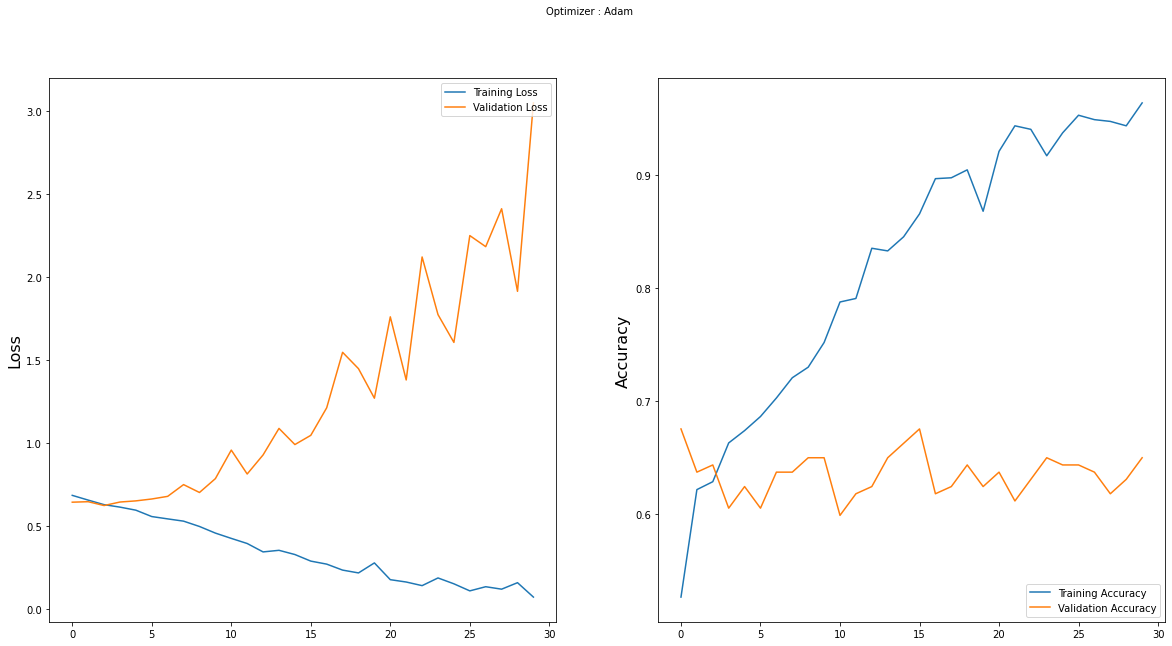

In [214]:
#plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [215]:
# summarize score
predictions = model.predict(X_test)
print(predictions[0:10])
predictions = np.round(predictions)
print(predictions[0:10])

[[9.9568921e-01 4.3107257e-03]
 [9.9996889e-01 3.1100342e-05]
 [1.0712970e-03 9.9892873e-01]
 [9.8023188e-01 1.9768106e-02]
 [4.6275350e-01 5.3724653e-01]
 [9.9946493e-01 5.3504767e-04]
 [9.9819368e-01 1.8062734e-03]
 [6.8504435e-01 3.1495568e-01]
 [7.3612094e-01 2.6387909e-01]
 [7.8067523e-01 2.1932475e-01]]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [216]:
t_df = pd.DataFrame(predictions, columns = ['Negative','Positive'])
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Negative  157 non-null    float32
 1   Positive  157 non-null    float32
dtypes: float32(2)
memory usage: 1.4 KB


In [217]:
t_df['pred']= np.select( [t_df.Negative==0 , t_df.Negative ==1] , [1 ,0] )

Model: auROC=0.556


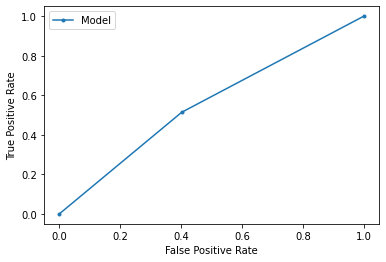

In [218]:
a = t_df.pred
print('Model: auROC=%.3f' % (roc_auc_score(y_test, a)))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, a)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()